In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
house = pd.read_csv("Housing.csv")

In [5]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
house.shape

(545, 13)

In [11]:
house.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [13]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [17]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [19]:
house.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

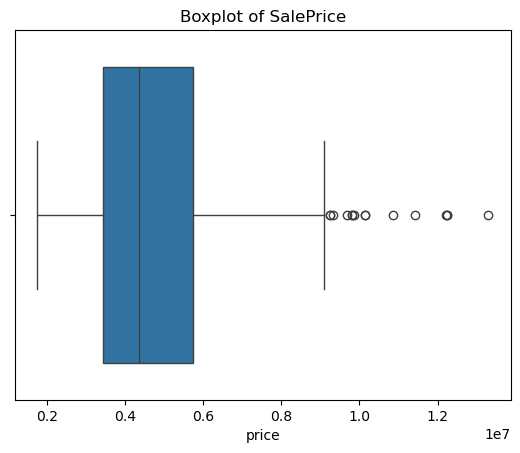

In [29]:
sns.boxplot(x=house["price"])
plt.title("Boxplot of SalePrice")
plt.show()


In [45]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Remove outliers in SalePrice
house = remove_outliers_iqr(house, 'price')

print("Dataset shape after outlier removal:", house.shape)


Dataset shape after outlier removal: (530, 13)


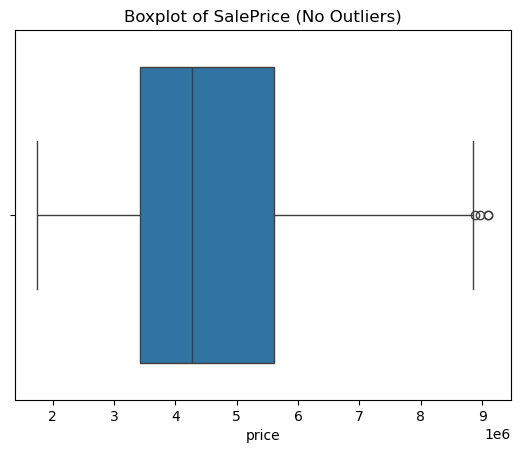

In [47]:
sns.boxplot(x=df_clean["price"])
plt.title("Boxplot of SalePrice (No Outliers)")
plt.show()


In [49]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [51]:
house.shape

(530, 13)

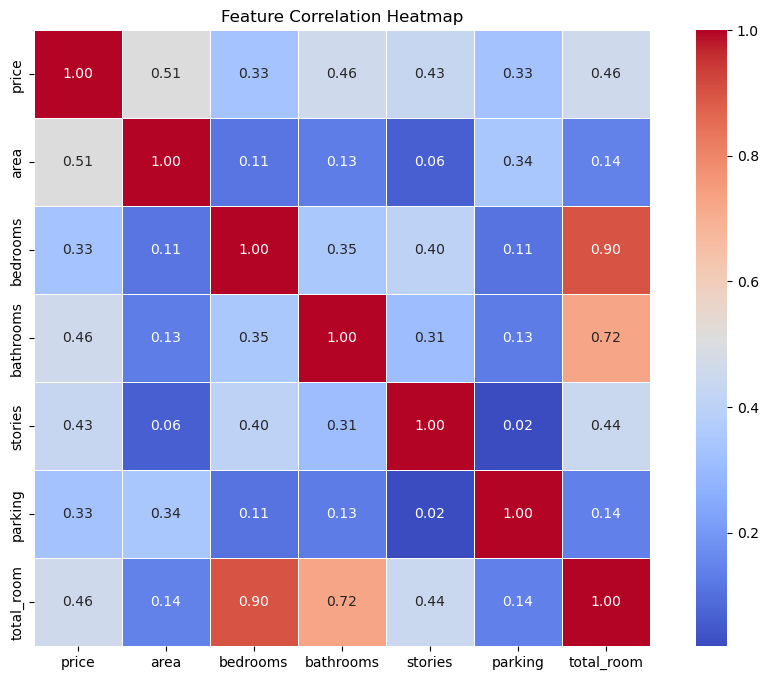

In [197]:
plt.figure(figsize=(12, 8))
corr_matrix = house.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

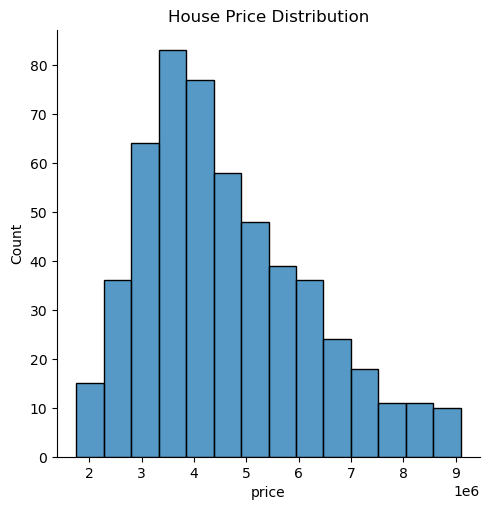

In [55]:
sns.displot(data=house, x="price")
plt.title("House Price Distribution")
plt.show()

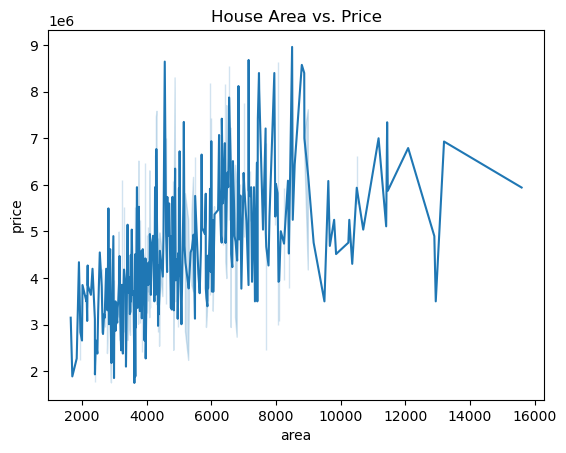

In [59]:
sns.lineplot(data=house, x="area", y="price")
plt.title("House Area vs. Price")
plt.show()

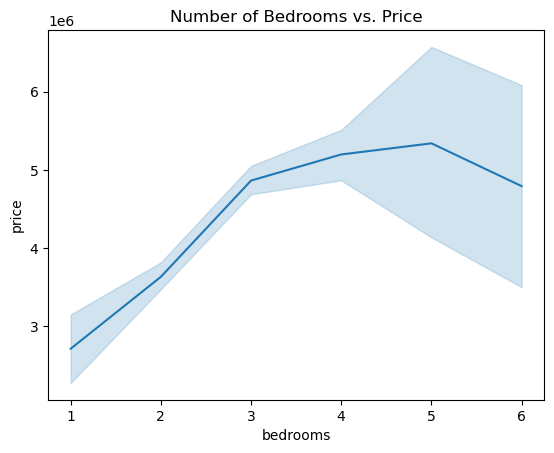

In [61]:
sns.lineplot(data=house, x="bedrooms", y="price")
plt.title("Number of Bedrooms vs. Price")
plt.show()

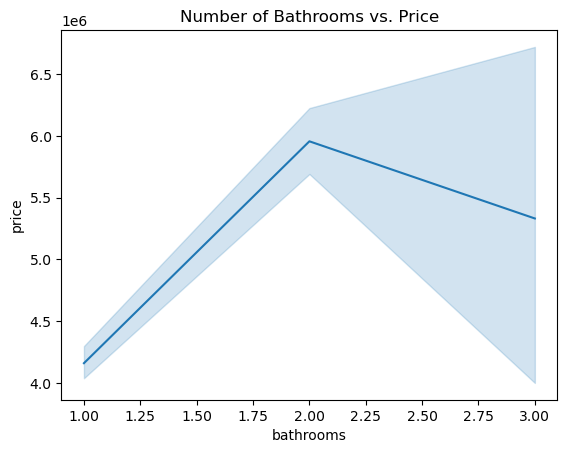

In [63]:
sns.lineplot(data=house, x="bathrooms", y="price")
plt.title("Number of Bathrooms vs. Price")
plt.show()

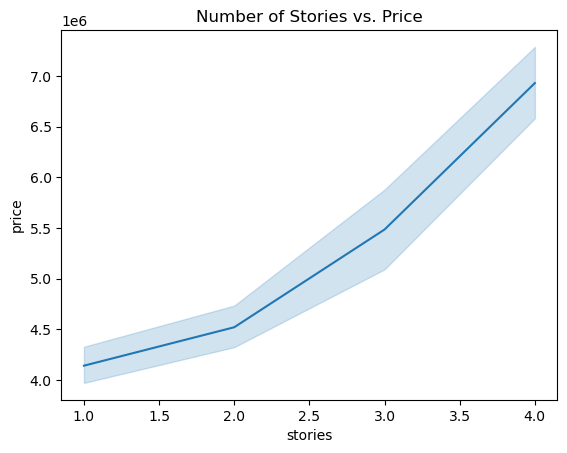

In [65]:
sns.lineplot(data=house, x="stories", y="price")
plt.title("Number of Stories vs. Price")
plt.show()

In [67]:
house.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished


In [69]:
house['total_room'] = house['bedrooms']+house['bathrooms']

C:\Users\hp\AppData\Local\Temp\ipykernel_15444\1447240364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['total_room'] = house['bedrooms']+house['bathrooms']


In [71]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_room
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,5
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,6
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished,5
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished,5
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,5


In [83]:
new_house = house[['price','area','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus','total_room']]


In [85]:
new_house.head()

,price,area,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_room
15,9100000,6000,2,yes,no,yes,no,no,2,no,semi-furnished,5
16,9100000,6600,2,yes,yes,yes,no,yes,1,yes,unfurnished,6
17,8960000,8500,4,yes,no,no,no,yes,2,no,furnished,5
18,8890000,4600,2,yes,yes,no,no,yes,2,no,furnished,5
19,8855000,6420,2,yes,no,no,no,yes,1,yes,semi-furnished,5


In [119]:
X = new_house.drop('price',axis=1)
y = new_house['price']

In [121]:
y

15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 530, dtype: int64

In [97]:
X

,area,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_room
15,6000,2,yes,no,yes,no,no,2,no,semi-furnished,5
16,6600,2,yes,yes,yes,no,yes,1,yes,unfurnished,6
17,8500,4,yes,no,no,no,yes,2,no,furnished,5
18,4600,2,yes,yes,no,no,yes,2,no,furnished,5
19,6420,2,yes,no,no,no,yes,1,yes,semi-furnished,5
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,yes,no,yes,no,no,2,no,unfurnished,3
541,2400,1,no,no,no,no,no,0,no,semi-furnished,4
542,3620,1,yes,no,no,no,no,0,no,unfurnished,3
543,2910,1,no,no,no,no,no,0,no,furnished,4


In [109]:
numerical = ['area','stories','parking','total_room']
binary = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
multi_features = ['furnishingstatus']

In [129]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('bin', OrdinalEncoder(), binary),
        ('multi', OneHotEncoder(drop='first'), multi_features)
    ])

In [131]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'stories', 'parking',
                                                   'total_room']),
                                                 ('bin', OrdinalEncoder(),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning', 'parking',
                                                   'prefarea']),
                                                 ('multi',
                                                  OneHotEncoder(drop='first'),
                                                  ['furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [137]:
print("R² Score:", model.score(X_test, y_test))

R² Score: 0.6518283559429332


In [149]:
y_pred = model.predict(X_test)


In [155]:
mean_actual = np.mean(y_test)

mae = mean_absolute_error(y_test, y_pred)
mae_percent = (mae / mean_actual) * 100

mse = mean_squared_error(y_test, y_pred)
mse_percent = (mse / mean_actual) * 100

r2 = r2_score(y_test, y_pred)
r2_percent = r2 * 100

In [159]:
print(f"MAE: {mae_percent}")
print(f"MSE: {mse_percent}")
print(f"R²: {r2_percent}")

MAE: 16.927707828312165
MSE: 25468952.25703723
R²: 65.18283559429332


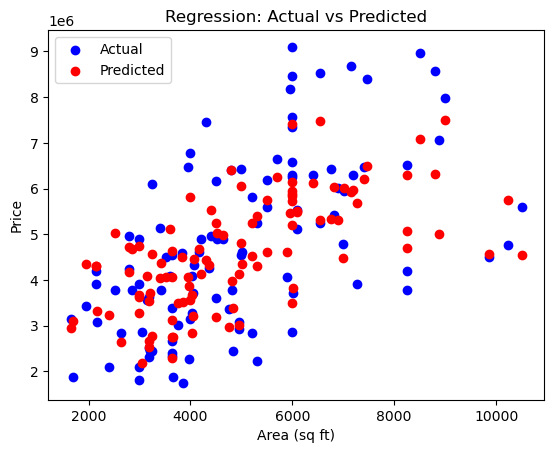

In [171]:
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted')
plt.title('Regression: Actual vs Predicted')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.show()



In [191]:
# If your pipeline has a 'preprocessor' step (e.g., ColumnTransformer)
preprocessor = model.named_steps['preprocessor']  # Replace 'preprocessor' with your step name
feature_names = preprocessor.get_feature_names_out()

# Then create the DataFrame
coefficients = pd.DataFrame(
    model.named_steps['regressor'].coef_,
    index=feature_names,  # Use transformed feature names
    columns=['Coefficient']
)


In [195]:
print("Model Coefficients:")
print(coefficients)

Model Coefficients:
                                          Coefficient
num__area                               418496.236092
num__stories                            347609.264987
num__parking                             79871.229170
num__total_room                         322338.309500
bin__mainroad                           453796.652299
bin__guestroom                          384102.994446
bin__basement                           327706.291370
bin__hotwaterheating                    836357.785894
bin__airconditioning                    788184.246569
bin__parking                             66521.642229
bin__prefarea                           561766.721793
multi__furnishingstatus_semi-furnished -109372.350536
multi__furnishingstatus_unfurnished    -375310.756125
